## Individual Project Planning Stage
#### Samuel Yu (68757251), Group 33

## 1. Data Description

For `players.csv`, there are a total of 196 observations and 7 columns (variables), which include:
- `experience (chr)`: The player's skill level (Beginner, Amateur, Regular, Veteran, Pro)
- `subscribe (lgl)`: Whether the player has an active subscription (TRUE = active, FALSE = inactive)
- `hashedEmail (chr)`: Encrypted email for security and privacy
- `played_hours (dbl)`: The number of hours the player has spent on the game
- `name (chr)`: The name of the player
- `gender (chr)`: The gender of the player
- `Age (dbl)`: The age of the player

For `sessions.csv`, there are a total of 1535 observations and 5 columns (variables), which include:
- `hashedEmail (chr)`: Encrypted email for security and privacy
- `start_time (chr)`: The current player session's start time (DD/MM/YYYY HH:MM)
- `end_time (chr)`: The current player session's end time (DD/MM/YYYY HH:MM)
- `original_start_time (dbl)`: The player's original start time
- `original_end_time (dbl)`: The player's original end time

There are some observations that contain NA, these will have to be removed as we wrangle the data. The data was collected by a research team in Computer Science at UBC led by Frank Wood.

## 2. Questions

The broad question I have chosen to address is: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"  
The formulated, specific question composed is: "Can the experience level, age, and subscription status of the player help predict the number of hours the player has on the game?"  
To answer this question, I will check for missing data, explore relationships between predictors and the target, and determine if linear regression or K-NN is more effective for analysis.

## 3. Exploratory Data Analysis and Visualization

### Load data (we will not need the data from sessions.csv):

In [37]:
library(tidyverse)
options(repr.matrix.max.rows = 6)

In [38]:
players_data <- read_csv("https://raw.githubusercontent.com/testifyer1041/DSCI-100-Group-Project-Individual-33-Samuel-Yu/refs/heads/main/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


First, we find the mean values for the variables we will use (`subscribe`, `played_hours`, `age`). For our purposes, the original data is already tidy.

In [39]:
player_mean <- players_data |>
    summarize(subscribe_rate = mean(subscribe, na.rm = TRUE),
              mean_played_hours = mean(played_hours, na.rm = TRUE),
              mean_age = mean(Age, na.rm = TRUE))
player_mean

subscribe_rate,mean_played_hours,mean_age
<dbl>,<dbl>,<dbl>
0.7346939,5.845918,21.13918


From this data, we can see that around 73.47% of players are subscribed, the average number of hours played is 5.85 hours, and the average player age is around 21.12 years old.

Next, we visualize the data between all the predictors and our target to see potential relationships.

We start with the average hours played and experience level.

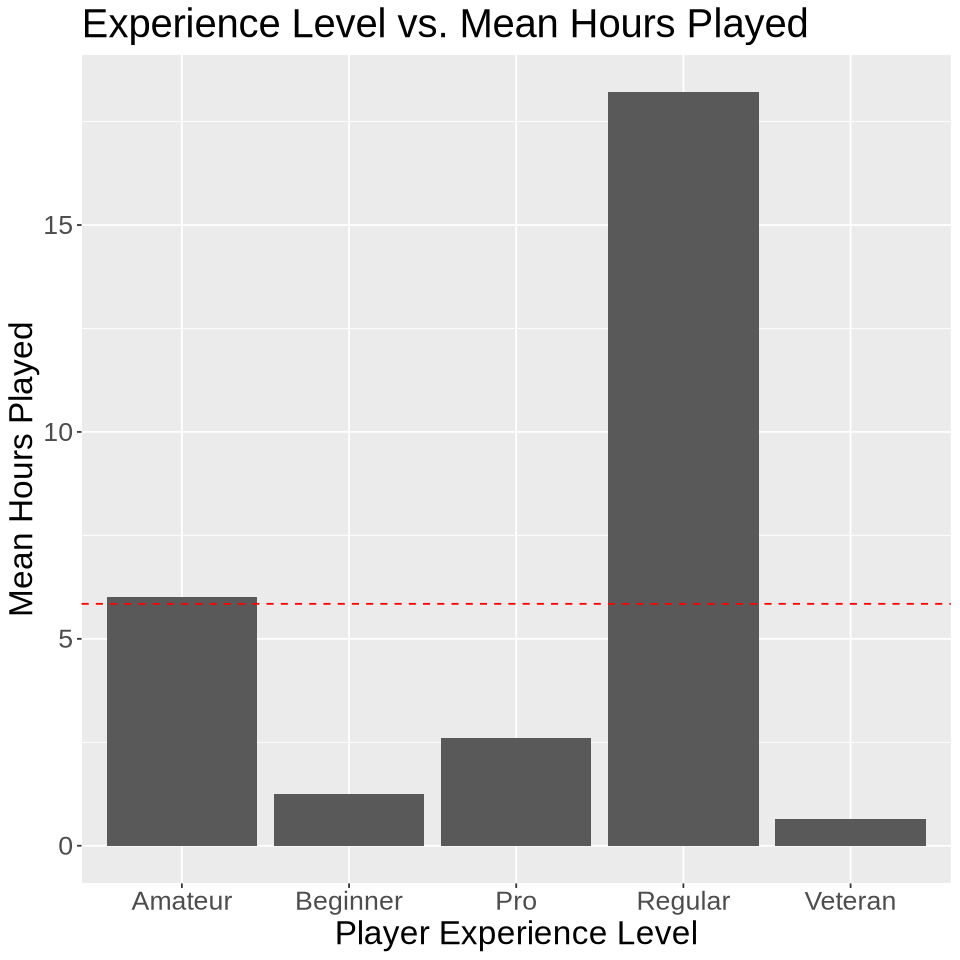

In [46]:
options(repr.plot.width = 8, repr.plot.height = 8) 
players_data |>
    group_by(experience)|>
    summarize(mean_hours_played = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = experience, y = mean_hours_played)) +
    geom_bar(stat = "identity") +
    geom_hline(yintercept = mean(players_data$played_hours, na.rm = TRUE), linetype = "dashed", color = "red") +
    labs(x = "Player Experience Level", y = "Mean Hours Played", title = "Experience Level vs. Mean Hours Played") +
    theme(text = element_text(size = 20))

We can see that there is a slight relationship between increasing experience and mean hours played, which could be used as a predictor.

Next, we look at the player subscription rate.

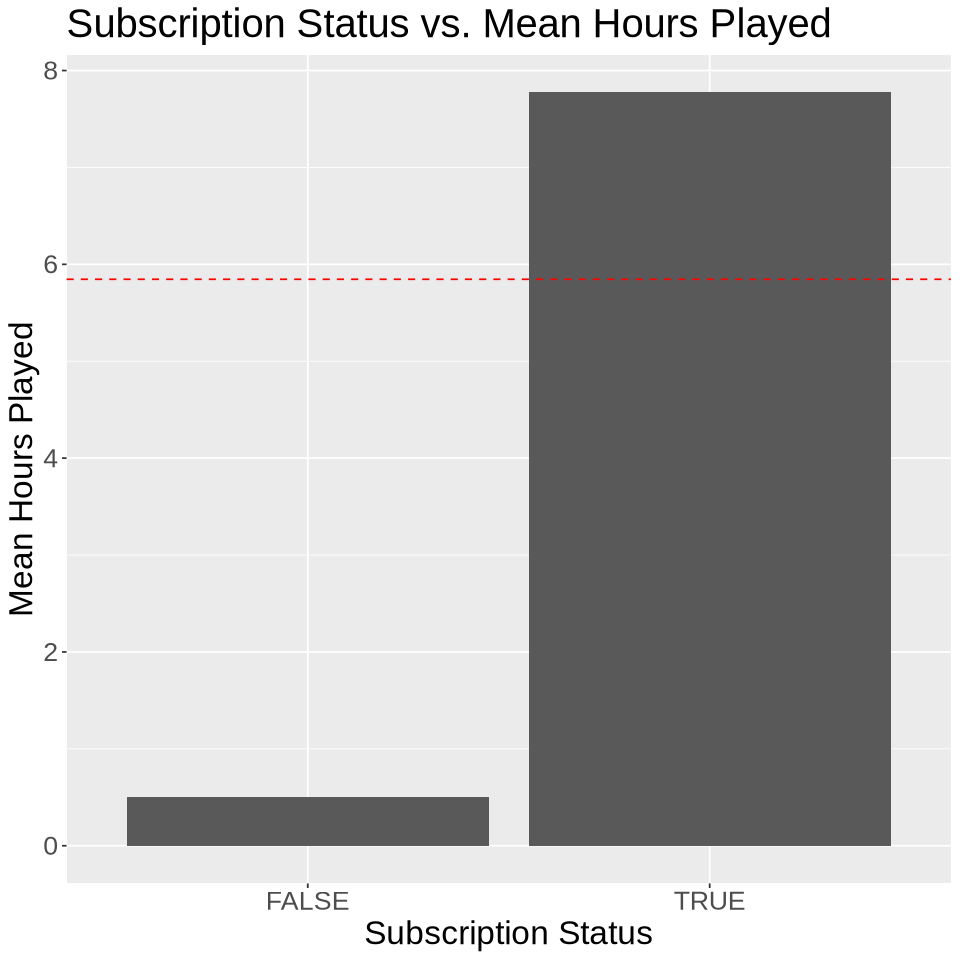

In [47]:
options(repr.plot.width = 8, repr.plot.height = 8) 
players_data |>
    group_by(subscribe)|>
    summarize(mean_hours_played = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = subscribe, y = mean_hours_played)) +
    geom_bar(stat = "identity") +
    geom_hline(yintercept = mean(players_data$played_hours, na.rm = TRUE), linetype = "dashed", color = "red") +
    labs(x = "Subscription Status", y = "Mean Hours Played", title = "Subscription Status vs. Mean Hours Played") +
    theme(text = element_text(size = 20))

We see that there is a solid relationship between the player subscription status and mean hours played.

Finally, we look at player age.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


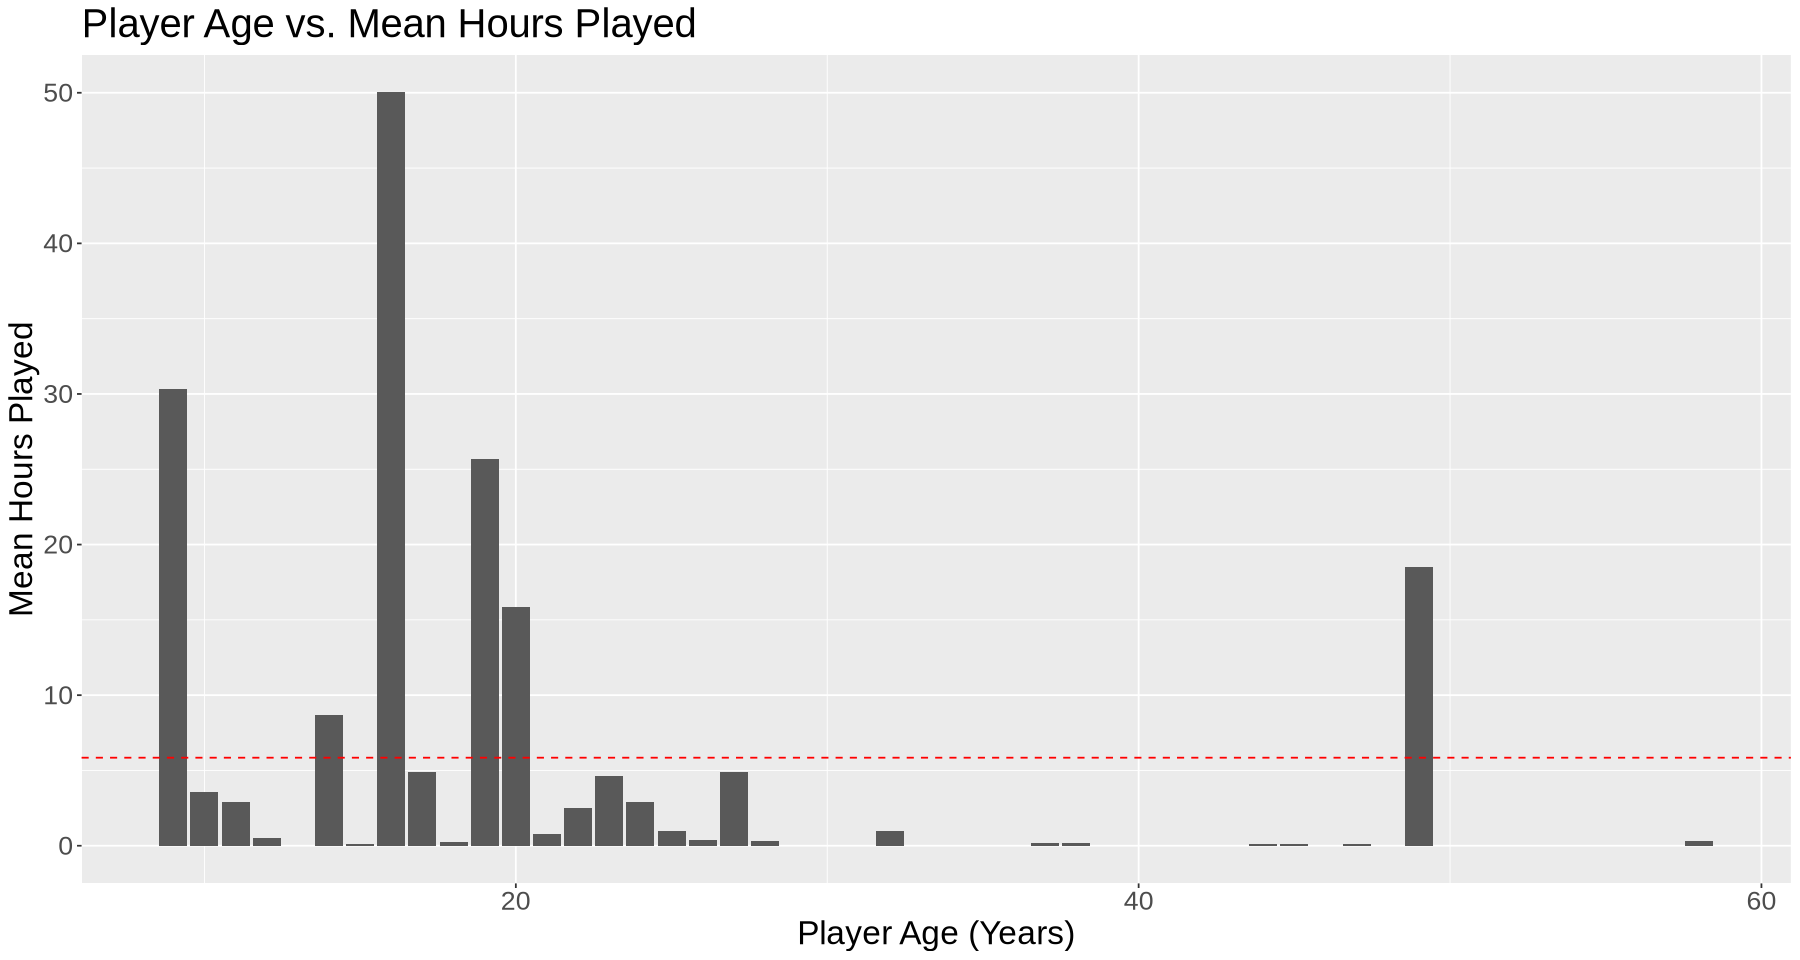

In [49]:
options(repr.plot.width = 15, repr.plot.height = 8) 
players_data |>
    group_by(Age)|>
    summarize(mean_hours_played = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = Age, y = mean_hours_played)) +
    geom_bar(stat = "identity") +
    geom_hline(yintercept = mean(players_data$played_hours, na.rm = TRUE), linetype = "dashed", color = "red") +
    labs(x = "Player Age (Years)", y = "Mean Hours Played", title = "Player Age vs. Mean Hours Played") +
    theme(text = element_text(size = 20))

We see that player age does not have a solid relationship with the mean hours played and so we discard Age as a predictor.

We determine that the `subscribe` and `experience` variables are good candidates at predicting the number of hours played, although more data may be needed.

## 4. Methods and Plan